In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

### Calculating covariance and correlation coeffecient using hand

In [2]:
ad = pd.DataFrame({'watched':[5,4,4,6,8], 'bought':[8,9,10,13,15]})

In [3]:
print(ad)

   watched  bought
0        5       8
1        4       9
2        4      10
3        6      13
4        8      15


In [4]:
print(ad.describe())

       watched     bought
count  5.00000   5.000000
mean   5.40000  11.000000
std    1.67332   2.915476
min    4.00000   8.000000
25%    4.00000   9.000000
50%    5.00000  10.000000
75%    6.00000  13.000000
max    8.00000  15.000000


In [5]:
print(ad.corr())

          watched    bought
watched  1.000000  0.871165
bought   0.871165  1.000000


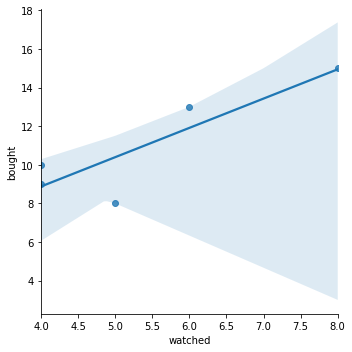

In [7]:
_ = sns.lmplot('watched', 'bought', data=ad)
plt.show()

In [8]:
# cross-product deviations: multiply the deviations of one variable by the corresponding deviations of a second variable

# for above examples Cross Product Deviations
watched_diff, bought_diff = [], []
for index, row in ad.iterrows():
    watched_diff.append(5.4-row['watched'])
    bought_diff.append(11-row['bought'])

In [9]:
print(watched_diff, bought_diff)

[0.40000000000000036, 1.4000000000000004, 1.4000000000000004, -0.5999999999999996, -2.5999999999999996] [3, 2, 1, -2, -4]


In [10]:
Cross_Product_Deviations = sum(np.multiply(watched_diff, bought_diff))
print(Cross_Product_Deviations)

17.0


#### Covariance (we got it from cross product deviations)

In [14]:
# covariance = Cross_Product_Deviations/(N-1)
Covariance = Cross_Product_Deviations/(5-1)
print(Covariance)

4.25


In [13]:
# now
watched_diff_standarized = np.array(watched_diff)/(ad['watched'].std())
bought_diff_standarized = np.array(bought_diff)/(ad['bought'].std())

In [15]:
Cross_Product_Deviatiions_standarized = sum(np.multiply(watched_diff_standarized, bought_diff_standarized))
print(Cross_Product_Deviatiions_standarized)

3.484660262185848


#### R, correlation coefficient is standarized covariance

In [16]:
Covariance_standarized = Cross_Product_Deviatiions_standarized/(5-1)
print(Covariance_standarized)

0.871165065546462


In [20]:
# also , we can get it by R = Covariance/(s1*s2)
print(Covariance/(ad['watched'].std() * ad['bought'].std()))

0.871165065546462


## Correlations

In [21]:
data = pd.read_csv('/home/atrides/Desktop/R/statistics_with_Python/06_Correlation/Data_Files/Exam Anxiety.dat', sep='\t')

In [22]:
print(data.head())

   Code  Revise  Exam  Anxiety  Gender
0     1       4    40   86.298    Male
1     2      11    65   88.716  Female
2     3      27    80   70.178    Male
3     4      53    80   61.312    Male
4     5       4    40   89.522    Male


In [23]:
data.set_index('Code', inplace=True, drop=True)

In [29]:
# pearson
print(data.corr())

           Revise      Exam   Anxiety
Revise   1.000000  0.396721 -0.709249
Exam     0.396721  1.000000 -0.440993
Anxiety -0.709249 -0.440993  1.000000


In [30]:
# kendall
print(data.corr(method='kendall'))

           Revise      Exam   Anxiety
Revise   1.000000  0.263326 -0.488560
Exam     0.263326  1.000000 -0.284792
Anxiety -0.488560 -0.284792  1.000000


### using scipy.stats, only does one pair of variables at a time

In [31]:
print(st.pearsonr(data['Revise'], data['Exam']))

(0.39672069692675677, 3.343451148053714e-05)


In [32]:
print(st.spearmanr(data['Revise'], data['Exam']))

SpearmanrResult(correlation=0.34989478093526827, pvalue=0.0002912864258449831)


In [33]:
print(st.kendalltau(data['Revise'], data['Exam']))

KendalltauResult(correlation=0.26332585349238524, pvalue=0.00014270086676695348)


In [34]:
print(st.pearsonr(data['Anxiety'], data['Exam']))

(-0.44099341160878863, 3.1278727730079265e-06)


# Note:

### use pearson r for parametric

### use spearman rho for non-parametric

### use tendall tau for non-parametric and small datasets

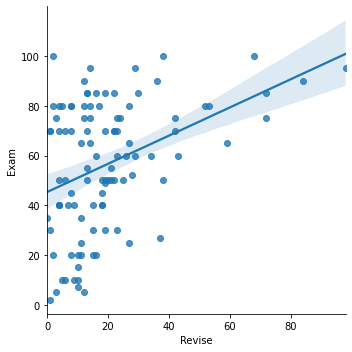

In [35]:
# seeing the relation with lmplot
_ = sns.lmplot('Revise', 'Exam', data=data)
plt.show()

## R^2 : measure of the amount of variability in one variable that is shared by the other

In [36]:
print((data.corr())**2)

           Revise      Exam   Anxiety
Revise   1.000000  0.157387  0.503035
Exam     0.157387  1.000000  0.194475
Anxiety  0.503035  0.194475  1.000000
